In [36]:

import pandas as pd
import numpy as np 

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,root_mean_squared_error

In [15]:
import seaborn as sns

In [18]:
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("uber.csv")

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [26]:
df.drop(['Unnamed: 0'],axis = 1,inplace=True)

In [12]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [14]:
# drop missing values because there is only one 
print(df.isnull().sum())

df.dropna(inplace=True)

df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

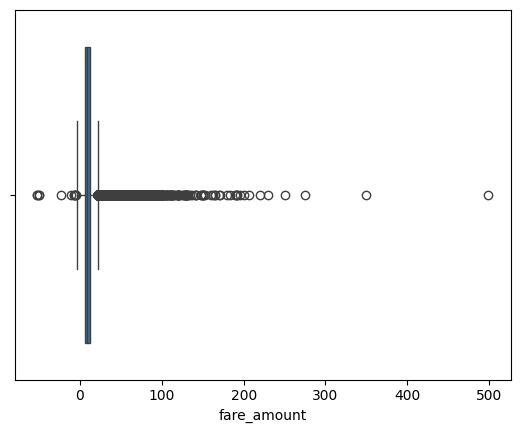

In [19]:
sns.boxplot(x=df['fare_amount'])
plt.show()

lower_bound = np.float64(-3.75) 
 upper_bound = np.float64(22.25)


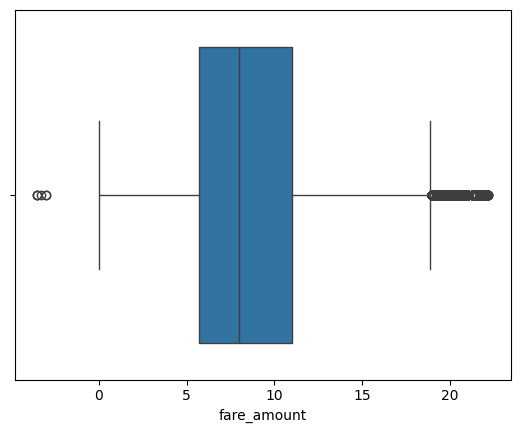

In [27]:
q1 = df['fare_amount'].quantile(0.25)
q3 = df['fare_amount'].quantile(0.75)

iqr = q3 - q1

threshold = 1.5
lower_bound = q1 - threshold * iqr
upper_bound = q3 + threshold * iqr

print(f"{lower_bound = } \n {upper_bound = }")

# remove outliers
df_cleaned = df[(df['fare_amount'] >= lower_bound) & (df['fare_amount'] <= upper_bound)] 

sns.boxplot(x = df_cleaned['fare_amount'])
plt.show()

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
dtype: object

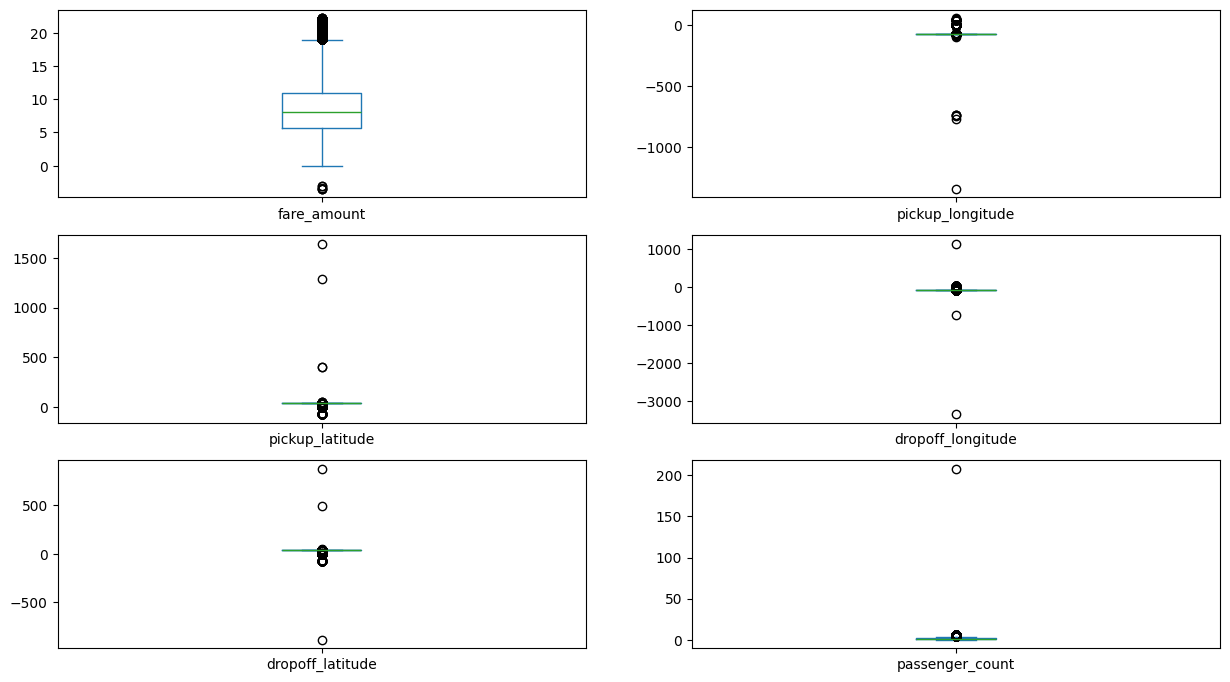

In [28]:
df_cleaned.plot(kind='box',subplots=True,layout=(7, 2), figsize=(15, 20))

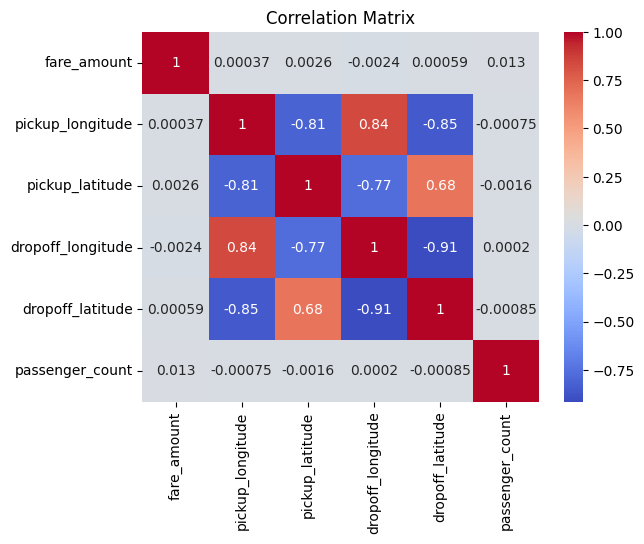

In [30]:
# correlation matrix

data = df_cleaned.select_dtypes(include=['int','float'])

corr_matrix = data.corr()

sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [31]:
# 4. Implement linear regression and random forest regression models
# Split the data into features and target variable
X = data[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
y = data['fare_amount']  #Target

y

0          7.5
1          7.7
2         12.9
3          5.3
4         16.0
          ... 
199994    12.0
199995     3.0
199996     7.5
199998    14.5
199999    14.1
Name: fare_amount, Length: 182833, dtype: float64

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Create and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [37]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [38]:
# 5. Evaluate the models
# Predict the values
y_pred_lr = lr_model.predict(X_test)
print("Linear Model:",y_pred_lr)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Model:", y_pred_rf)

Linear Model: [8.9092654  8.90920366 8.90920456 ... 9.12111117 8.90927677 8.90927104]
Random Forest Model: [ 5.043 18.156  7.602 ...  7.388  4.326 10.234]


In [39]:
# r2 error
l_r2 = r2_score(y_test,y_pred_lr)
l_rmse = root_mean_squared_error(y_test,y_pred_lr)

r_r2 = r2_score(y_test,y_pred_rf)
r_rmse = root_mean_squared_error(y_test,y_pred_rf)

In [40]:
print("Linear Model - R2 Score = ",l_r2)
print("Linear Model - RMSE = ",l_rmse)

print("RF Model - R2 Score = ",r_r2)
print("RF Model - RMSE = ",r_rmse)

Linear Model - R2 Score =  8.29713376748753e-05
Linear Model - RMSE =  4.136624287486402
RF Model - R2 Score =  0.7050924405510965
RF Model - RMSE =  2.246503232305926
